# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [3]:
# x = pd.read_csv("./data/bw_rescaled_x.csv", delimiter=",", header = None) # load from processed images

In [2]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [3]:
x = x.values
x = x.astype(np.float32)
x /= 255

In [4]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [5]:
#visualizing 5 images indexes in array images by start and shows corresponding labels
def plotter(images, labels, start):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[start:start+5], labels[start:start+5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
        plt.title('Training: %i\n' % label, fontsize = 20)

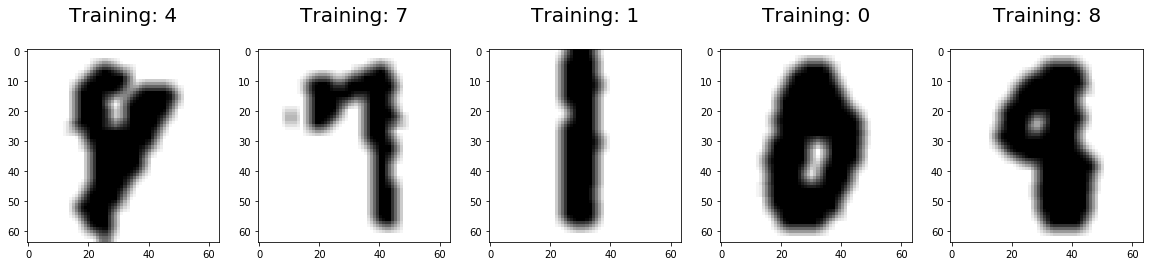

In [6]:
#checking we loaded data correctly
plotter(x, y, 0)

In [8]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is splitting the processed data

np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [47]:
logisticRegr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000)

In [48]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [50]:
corr = 0

for i, pred in enumerate(predictions):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Accuracy: 0.7624


In [ ]:
test_x = pd.read_csv("./data/processed_test_x.csv", delimiter=",", header = None) # load from text 

In [ ]:
test_x = test_x.values
test_x = test_x.astype(np.float32)
test_x /= 255

In [ ]:
#visualizing a random 5 images
indices = list(range(test_x.shape[0]))
#plotter(test_x, indices, 0)

In [ ]:
#train on whole dataset
logisticRegr.fit(x, y)

In [ ]:
#predict on validation
predictions = logisticRegr.predict(test_x)

In [ ]:
ids = list(range(len(predictions)))

output = pd.DataFrame({'Id': ids, 'Label': predictions})

output.to_csv("./data/LogisticPredictions.csv", header = True, index = False)

In [ ]:
plotter(test_x, predictions, 1000)